In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('foodmatch.csv')

In [9]:
def wdays(name):
    for col in df:
        if col.startswith(name): yield col

In [20]:
df[wdays("Wednesday")].mean(axis=1)

0    11.0
1    15.0
2     6.0
3    16.5
dtype: float64

In [22]:
newdf = df[['Cafes', 'Foodtype', 'GEO']]

In [26]:
def addmean(name):
    newdf[name] = df[wdays(name)].mean(axis=1)

In [42]:
weekdays = list(df)[3:10]

In [43]:
for wd in weekdays: addmean(wd)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11e6e7bd0>,
      dtype=object)

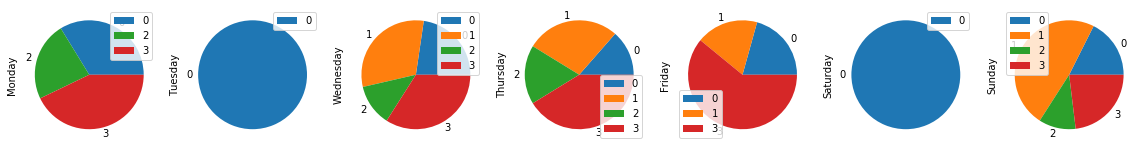

In [59]:
newdf[weekdays].plot.pie(subplots=True, figsize=(20, 20))

In [74]:
newdf[["latitude", "longitude"]] = newdf["GEO"].str.split(", ", expand=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [87]:
newdf.to_csv("food_wdays_mean.csv")

In [101]:
newdf

,Cafes,Foodtype,GEO,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,latitude,longitude,vegan,Specificity,Bakery,Garniers,Main,Salads,Soups
0,ресторан1 (пан-запекан),"гарниры,салаты","55.778168, 37.601470",13.0,14.666667,11.0,7.333333,9.0,10.0,8.0,55.778168,37.601470,0,0,5,25,50,25,0
1,ресторан2 (веган),"гарниры,салаты","55.755053, 37.590536",NaN,NaN,15.0,15.000000,8.0,NaN,22.0,55.755053,37.590536,1,2,0,75,0,25,0
2,ресторан3 (кондитерская),выпечка,"55.741161, 37.594191",9.0,NaN,6.0,9.500000,NaN,NaN,5.0,55.741161,37.594191,0,1,100,0,0,0,0
3,ресторан4 (супы),супы,"55.754994, 37.650928",16.5,NaN,16.5,22.333333,26.5,NaN,10.5,55.754994,37.650928,0,0,0,0,0,0,100


In [100]:
newdf['Soups'] = [0, 0, 0, 100]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
